<a href="https://colab.research.google.com/github/ShivaAtom/AI-Practices/blob/main/LSTMDiccPalabras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

In [ ]:
with open('Cancion.txt','r') as song:
  text = song.read()

In [ ]:
text =text.lower()
text = text.replace('.','').replace(',','').replace('\n',' ').replace('?','').replace('¿','').replace("'",'')
aux,ar_palabras ='',[]
for i in text:
  if i != ' ':
    aux = aux + i
  else:
    ar_palabras.append(aux)
    aux=''
alfabeto = list(set(ar_palabras))

In [ ]:
print(ar_palabras)
print(alfabeto)

['en', 'tu', 'mente', 'empieza', 'el', 'fuego', 'tú', 'ya', 'no', 'ves', 'lo', 'que', 'yo', 'creo', 'lo', 'que', 'veo', 'es', 'lo', 'que', 'niego', 'y', 'en', 'el', 'fuego', 'están', 'tus', 'celos', '', 'lo', 'que', 'dices', 'que', 'no', 'es', 'verdad', 'revienta', 'en', 'el', 'cristal', 'y', 'esa', 'es', 'tu', 'realidad', 'estas', 'ganas', 'de', 'enseñarte', 'lo', 'que', 'es', 'real', 'se', 'irán', 'de', 'noche', 'pa', 'que', 'en', 'sueños', 'imagines', 'que', 'te', 'vas', 'porque', '', 'antes', 'de', 'mirarme', 'reclamarme', 'no', 'hace', 'bien', 'ya', 'no', 'tengo', 'nada', 'en', 'ganas', 'de', 'volverte', 'a', 'ver', '', 'antes', 'de', 'que', 'mientas', 'otra', 'vez', 'el', 'cielo', 'caerá', '', 'y', 'en', 'el', 'fuego', 'de', 'tus', 'celos', 'este', 'cielo', 'quemarás', 'es', 'el', 'infierno', 'que', 'tanto', 'querrás', 'a', 'gritos', 'pedías', 'hacernos', 'el', 'mal', 'o', 'no', 'es', 'el', 'estado', 'que', 'tanto', 'anhelabas', '', 'a', 'gritos', 'pedías', 'hacernos', 'el', 'mal

In [ ]:
pal_a_ind = {pal:ind for ind,pal in enumerate(alfabeto)}
ind_a_pal = {ind:pal for ind,pal in enumerate(alfabeto)}

In [ ]:
print(pal_a_ind)
print(ind_a_pal)

{'': 0, 'que': 1, 'te': 2, 'anhelabas': 3, 'se': 4, 'el': 5, 'tengo': 6, 'hacernos': 7, 'dices': 8, 'pedías': 9, 'irán': 10, 'atrás': 11, 'tú': 12, 'antes': 13, 'tanto': 14, 'reclamarme': 15, 'estas': 16, 'real': 17, 'niego': 18, 'creo': 19, 'esa': 20, 'enseñarte': 21, 'verdad': 22, 'ver': 23, 'empieza': 24, 'en': 25, 'gritos': 26, 'mente': 27, 'sueños': 28, 'otra': 29, 'quemarás': 30, 'noche': 31, 'caerá': 32, 'imagines': 33, 'es': 34, 'realidad': 35, 'hay': 36, 'hace': 37, 'celos': 38, 'no': 39, 'fuego': 40, 'revienta': 41, 'a': 42, 'mal': 43, 'infierno': 44, 'qué': 45, 'lo': 46, 'yo': 47, 'cristal': 48, 'tus': 49, 'ves': 50, 'tu': 51, 'volverte': 52, 'vez': 53, 'y': 54, 'de': 55, 'más': 56, 'bien': 57, 'querrás': 58, 'veo': 59, 'cielo': 60, 'estado': 61, 'mires': 62, 'porque': 63, 'mientas': 64, 'o': 65, 'están': 66, 'vas': 67, 'ganas': 68, 'mirarme': 69, 'ya': 70, 'este': 71, 'pa': 72, 'nada': 73}
{0: '', 1: 'que', 2: 'te', 3: 'anhelabas', 4: 'se', 5: 'el', 6: 'tengo', 7: 'hacernos

In [ ]:
x_pre,y_pre=[],[]
aux=[]
for i in range(len(ar_palabras)-1):
  aux.append(ar_palabras[i])
  aux.append(ar_palabras[i+1])
  x_pre.append(aux)
  aux=[]
x_pre.pop()
for i,val in enumerate(ar_palabras):
  if i != 0 and i != 1:
    y_pre.append(val)

In [ ]:
print(x_pre)
print(y_pre)

[['en', 'tu'], ['tu', 'mente'], ['mente', 'empieza'], ['empieza', 'el'], ['el', 'fuego'], ['fuego', 'tú'], ['tú', 'ya'], ['ya', 'no'], ['no', 'ves'], ['ves', 'lo'], ['lo', 'que'], ['que', 'yo'], ['yo', 'creo'], ['creo', 'lo'], ['lo', 'que'], ['que', 'veo'], ['veo', 'es'], ['es', 'lo'], ['lo', 'que'], ['que', 'niego'], ['niego', 'y'], ['y', 'en'], ['en', 'el'], ['el', 'fuego'], ['fuego', 'están'], ['están', 'tus'], ['tus', 'celos'], ['celos', ''], ['', 'lo'], ['lo', 'que'], ['que', 'dices'], ['dices', 'que'], ['que', 'no'], ['no', 'es'], ['es', 'verdad'], ['verdad', 'revienta'], ['revienta', 'en'], ['en', 'el'], ['el', 'cristal'], ['cristal', 'y'], ['y', 'esa'], ['esa', 'es'], ['es', 'tu'], ['tu', 'realidad'], ['realidad', 'estas'], ['estas', 'ganas'], ['ganas', 'de'], ['de', 'enseñarte'], ['enseñarte', 'lo'], ['lo', 'que'], ['que', 'es'], ['es', 'real'], ['real', 'se'], ['se', 'irán'], ['irán', 'de'], ['de', 'noche'], ['noche', 'pa'], ['pa', 'que'], ['que', 'en'], ['en', 'sueños'], ['s

In [ ]:
def conversion(diccionario, array):
  aux = []
  for i in array:
    aux.append(diccionario[i])
  return(aux)

In [ ]:
Y = conversion(pal_a_ind,y_pre)
X=[]
for i in x_pre:
  X.append(conversion(pal_a_ind,i))

In [ ]:
print(X)
print(Y)

[[25, 51], [51, 27], [27, 24], [24, 5], [5, 40], [40, 12], [12, 70], [70, 39], [39, 50], [50, 46], [46, 1], [1, 47], [47, 19], [19, 46], [46, 1], [1, 59], [59, 34], [34, 46], [46, 1], [1, 18], [18, 54], [54, 25], [25, 5], [5, 40], [40, 66], [66, 49], [49, 38], [38, 0], [0, 46], [46, 1], [1, 8], [8, 1], [1, 39], [39, 34], [34, 22], [22, 41], [41, 25], [25, 5], [5, 48], [48, 54], [54, 20], [20, 34], [34, 51], [51, 35], [35, 16], [16, 68], [68, 55], [55, 21], [21, 46], [46, 1], [1, 34], [34, 17], [17, 4], [4, 10], [10, 55], [55, 31], [31, 72], [72, 1], [1, 25], [25, 28], [28, 33], [33, 1], [1, 2], [2, 67], [67, 63], [63, 0], [0, 13], [13, 55], [55, 69], [69, 15], [15, 39], [39, 37], [37, 57], [57, 70], [70, 39], [39, 6], [6, 73], [73, 25], [25, 68], [68, 55], [55, 52], [52, 42], [42, 23], [23, 0], [0, 13], [13, 55], [55, 1], [1, 64], [64, 29], [29, 53], [53, 5], [5, 60], [60, 32], [32, 0], [0, 54], [54, 25], [25, 5], [5, 40], [40, 55], [55, 49], [49, 38], [38, 71], [71, 60], [60, 30], [30

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
nn = len(alfabeto)*4
nn_2 = len(alfabeto)*2

modelo = keras.Sequential([
    keras.layers.Input(shape=(2,1)),
    keras.layers.LSTM(nn),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(nn_2,activation='relu'),
    keras.layers.Dense(1,activation='relu')
])

In [ ]:
modelo.compile(
    optimizer='adam',
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [ ]:
his = modelo.fit(X,Y,epochs=600,batch_size=100,verbose=False)

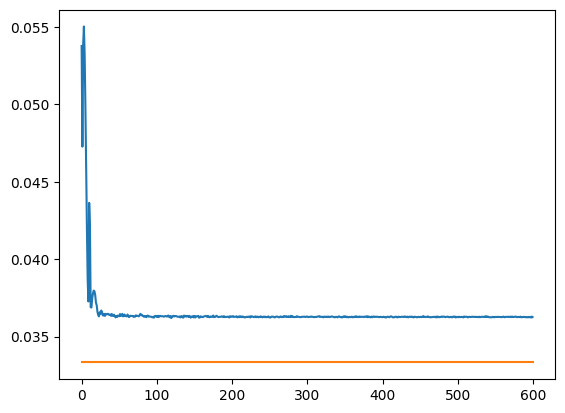

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['accuracy'])

In [ ]:
test =['tu','mente']

In [ ]:
res = conversion(pal_a_ind,test)
res = np.array([res])

In [ ]:
pre = modelo.predict(res)

1/1 [==============================] - 0s 16ms/step


In [ ]:
res_2 = pre[0][0]*len(alfabeto)
palabra=ind_a_pal[int(res_2)]
print(palabra)

volverte
